Group XX (Name 1, Name 2, Name 3, Name 4)

# Homework 7

This homework revolves all around eigenvalues, eigenvectors, and corresponding matrix decompositions.

Note: As in the last homework, the different tasks are only minimally interdependent, so it should be possible to solve most other tasks if you get stuck on one of them.

Let's start with intialization.

In [70]:
import numpy as np                # basic arrays, vectors, matrices
import scipy as sp                # matrix linear algebra 

import matplotlib                 # plotting
import matplotlib.pyplot as plt   # plotting
from matplotlib.image import imread

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");


<div class="alert alert-info">
    
### Singular Value Decomposition (SVD)
</div>

As discussed in the course, the singular value decomposition (SVD) can be used to compute the principal component analysis (PCA), which identifies the most important axes in a data set.

In this homework, we will apply this to analyze a data set comprised of photos of faces. The data considered here is a standard data set for machine learning applications, the [Extended Yale Database (Set B)](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html). 

For this homework, since the point is not to exercise data loading and conversion, the data set has been converted to a format that can be directly read using NumPy functions. Let's load the data and take a first look.

<div class="alert alert-danger">
    
**Note:** Please download the file `faces.npz` from the OLAT materials folder, and put it in the same directory as this notebook.
</div>

In [2]:
faces = np.load("faces.npz")['faces']
print( "data set shape:", faces.shape )
print( "data set type: ", faces.dtype)

data set shape: (1071, 64, 64)
data set type:  uint8


After loading, the `faces` array contains 1071 images of size 64x64 pixels, with integer values in the range [0, 255].

To obtain a first inspection of the data, we set some default parameters for matplotlib (so we obtain nicer images), and define a convenience function `plot_face` that we will use to not have to worry about the details of plotting faces from here on out.

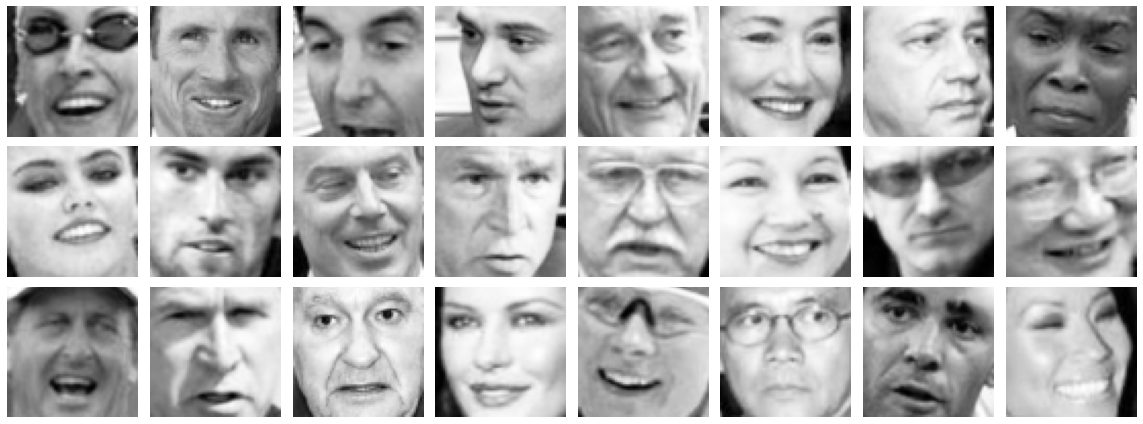

In [3]:
# set some matplotlib parameters for better figures
matplotlib.rcParams["image.cmap"] = 'Greys_r'
matplotlib.rcParams["figure.autolayout"] = True

# define convenience function for face visualization
def plot_face(ax, face):
    """convenience function for visualizing a 64x64 face vector"""
    ax.imshow(face.reshape(64,64))
    ax.axis('off')
    return ax

# plot the first 24 faces
fig, axes = plt.subplots(3, 8, figsize=(16,6))

for ax, face in zip(axes.flatten(), faces):
    plot_face(ax, face)

These faces look all quite different. PCA will allow us to tell if and how the faces are correlated, and what the corresponding dimensions are.

First, we prepare the data matrix $X$ by turning the 64x64 images into row vectors of length 4096 (by just concatenating the rows of each image). Second, we compute the mean image $\bar{X}$ (`Xmean`) and subtract it from all images such that we obtain mean-free data in `Xmf`

Let's also look at the mean face:

(1071, 4096)
(4096,)
(1071, 4096)


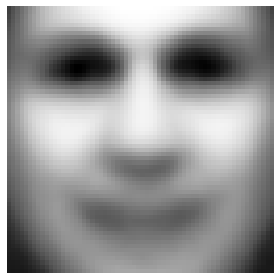

In [36]:
# turn images into vectors
X = np.reshape(faces, (1071, 4096))
print(X.shape)

# compute mean image
Xmean = np.average(X, axis=0)


# compute mean free data
Xmf = X - Xmean

# visualize mean face
plot_face(plt.gca(), Xmean);

What do the images look like with removed mean? Simply, we just plot them again.

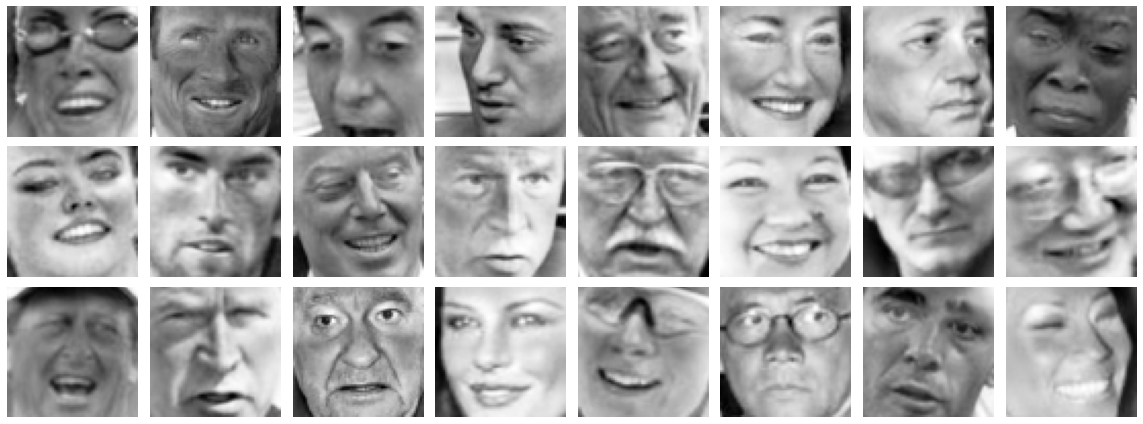

In [5]:
fig, axes = plt.subplots(3, 8, figsize=(16,6))

for ax, face in zip(axes.flatten(), Xmf):
    plot_face(ax, face)  

Not dramatically different, but can see that distinctive features (image regions which are far from the mean) stick out a little more than before mean removal.

As discussed, the principal components can be obtained from the SVD of the mean-free data matrix. Since $X$ is a $(1071\times 4096)$-matrix, we compute the decomposition

$$
X - (\bar X, \dots, \bar X)^T  = U\,\Sigma\,V^T
$$

where $\Sigma$ is again a $(1071\times 4096)$-matrix that contains only the singular values $\sigma_i$ on the diagonal and zeros otherwise. $V = (\mathbf{v}_1,\dots,\mathbf{v}_{4096})$ is a $(4096\times 4096)$-matrix that contains as its columns a basis of the space of all images (4096 basis vectors of size 4096 each, called the right singular vectors).

[`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) computes this decomposition:

In [6]:
U, S, VT = np.linalg.svd(Xmf)

Nicely enough, the returned $S$ is not a full matrix, but contains just the diagonal entries of $\Sigma$ (the singular values). Instead of $V$, the function returns $V^T$ directly, such that `VT[i]` ($i$-th row of $V^T$) directly gives the $i$-th basis vector $v_i$ (the $i$-th column of $V$).

Even nicer, `numpy.linalg.svd` returns the singular values in descending order; hence the principal component corresponds to the singular value $\sigma_0$ (in `S[0]`), and $V$ is ordered accordingly, such that `VT[0]` is the first principal component.

We can visually inspect the first few principal components by just visualizing them.

<div class="alert alert-success">

**Task:** Visualize the first 32 principal components.
</div>

In [11]:
# TODO

for i in range(31):
    print(VT[i])
    


[-0.00922479 -0.01005033 -0.01055075 ... -0.00625011 -0.0059497
 -0.00569308]
[-0.02134862 -0.02228972 -0.02281362 ...  0.02140782  0.02143464
  0.02120875]
[0.02426555 0.02266858 0.02070109 ... 0.03548751 0.03611101 0.03642573]
[-0.03284543 -0.03539612 -0.03807205 ...  0.00172978  0.00166368
  0.00134314]
[ 0.00330593  0.00226402  0.00064613 ... -0.03572564 -0.03461541
 -0.03319463]
[-0.02533434 -0.02453434 -0.0214987  ...  0.01945581  0.01909218
  0.01708614]
[-0.02363586 -0.02423973 -0.02319545 ... -0.01039455 -0.00941851
 -0.00776749]
[0.03903958 0.04146944 0.04230884 ... 0.02231954 0.02304121 0.02197664]
[0.0213032  0.02258892 0.02305712 ... 0.02887636 0.03070543 0.03073923]
[-0.00884739 -0.00849067 -0.00777588 ...  0.05736258  0.05703478
  0.05473863]
[ 0.02637998  0.02590879  0.02503982 ... -0.01048762 -0.0115897
 -0.01148922]
[ 0.00783191  0.00790905  0.00976613 ... -0.01986356 -0.02159417
 -0.02272274]
[-0.01812084 -0.01898529 -0.01933189 ... -0.01594835 -0.01767265
 -0.018996

As is apparent, the main variance (corresponding to higher singular values) captures large-scale features, while with increasing $k$, column $v_k$ captures increasingly smaller details.

<div class="alert alert-success">

**Task**: Verify that $V$ is indeed an orthogonal matrix.
</div>

In [13]:
# TO DO

I = VT@VT.transpose()
print(I)

#VT is orthogonal, if VT mulitplied with VT transposed equals identity matrix.

[[ 1.00000000e+00  3.10081821e-16  2.60208521e-17 ...  4.98732999e-18
   4.98732999e-18 -1.59919820e-18]
 [ 3.10081821e-16  1.00000000e+00  3.19189120e-16 ... -1.39862080e-17
   2.73354473e-17 -2.60208521e-18]
 [ 2.60208521e-17  3.19189120e-16  1.00000000e+00 ... -1.19262239e-17
   3.18755439e-17  2.38524478e-17]
 ...
 [ 4.98732999e-18 -1.39862080e-17 -1.19262239e-17 ...  1.00000000e+00
   5.55111512e-17  6.37510877e-17]
 [ 4.98732999e-18  2.73354473e-17  3.18755439e-17 ...  5.55111512e-17
   1.00000000e+00  0.00000000e+00]
 [-1.59919820e-18 -2.60208521e-18  2.38524478e-17 ...  6.37510877e-17
   0.00000000e+00  1.00000000e+00]]


Partial reconstruction of a face using only the $K$ first basis vectors can be achieved as follows: let $f = X_j$ be one of the faces, then we want to write the reconstruction $f_K$ as the linear combination

$$f_K\ =\ \bar{X} + \sum_{i=0}^{K-1} c_i v_i$$

where the component $c_i$ of $f$ in direction $v_i$ is just given by the projection of $f-\bar{X}$ onto $v_i$, $c_i = \langle f-\bar{X}, v_i \rangle$. Turning to matrix notation, this simplifies to

$$f_K\ =\ \bar{X}\ +\ \sum_{i=0}^{K-1} v_i c_i \ =\ \bar{X}\ +\ \sum_{i=0}^{K-1} v_i \langle v_i, f-\bar{X} \rangle\ = \ \bar{X}\ +\ \sum_{i=0}^{K-1} v_i v_i^T (f-\bar{X}),$$

or, even simpler

$$f_K\ =\ \bar{X}\ +\ (v_0,\dots,v_{K-1})^{\phantom{T}} (v_0,\dots,v_{K-1})^T (f-\bar{X}),$$

where $(v_0,\dots,v_{K-1})$ is the (sub-)matrix consisting of the first $K$ columns of $V$.



<div class="alert alert-success">

**Task**: Implement the function `reconstruct` that computes the reconstruction $f_K$ given $f$ (`face`), `VT`, `Xmean`, and $K$.

Note: below the function, there is code to do two things:

1. Verify that the reconstruction works correctly by computing the full reconstruction $f_{1071}$ using all basis vectors, which shold be identical to the original image.

2. Visualize the original face, as well as the reconstructed face using $K = 100$.

If your code is correct, both of these should do sensible things.
</div>

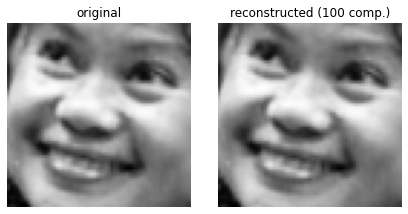

In [51]:
def reconstruct(f, VT, Xmean, K):
    # TO DO
    """reconstruct face using K columns of VT and Xmean"""
    
    FX = np.zeros((np.shape(f)))
    
    
    #first K rows of VT
    V_K = VT[:K,:]
    
    FX = f-Xmean
    
    a = np.matmul(VT, np.transpose(VT))
    
    fK = Xmean + a@FX
    
    return fK    
 

# choose one face as a test image
f = X[666,:]

# verify that full reconstruction gives identical image
if not np.allclose( reconstruct(f, VT, Xmean, 1071), f ):
    print("full reconstruction DOES NOT match")

# visualize original and reconstruction
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6,3))

plot_face(ax0, f)
ax0.set_title("original");

plot_face(ax1, reconstruct(f, VT, Xmean, 100))
ax1.set_title("reconstructed (100 comp.)");

Even though the original data is 4096-dimensional, with only $K=100$ principal components, we can achieve a passable reconstruction.

Instead of guessing the right $K$ to achieve a passable reconstruction, we can proceed as follows. From the course, we know that the singular values $\sigma_i$ are the square roots of the eigenvalues $\lambda_i$ of the data's covariance matrix $(X-\bar{X})^T (X-\bar{X})$ in descending order. Furthermore, the fraction 

$$ \frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots + \lambda_n} $$

accounts for the overall variance of the data. We can determine the smallest $K$ such that enough variance is accounted for:

$$
\min_{K}
\frac{\lambda_1 + \dots + \lambda_K}{\lambda_1 + \dots + \lambda_n}\ 
\ >\ C
$$

for some choice of $C$ (e.g. 95%).

<div class="alert alert-success">

**Task:** 
1. Write a function `var_K` to compute the accounted-for variance as a function of $K$, and visualize the result below in `ax0`.
2. Write a function `min_K` to compute the minimum $K$ to account for 95% variance, and visualize the corresponding reconstruction as above.

For both subtasks, the function [`numpy.cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) will come in handy. Also, remember that `S` is the vector of singular values in descending order. 
</div>

In [ ]:
def var_K(S, K):
    # TO DO
    """
       return the fraction of variance accounted for by the first
       K principal components, given the singular values S
    """
    return ...
    
def min_K(S, C):
    # TO DO
    """
       return minimal K such that the fraction of variance accounted 
       for by the first K principal components exceeds C
    """
    return ...
    

Kmin = min_K(S, 0.95)

# visualize and plot results
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9,3))

K = range(len(VT))
V = [var_K(S, k) for k in K]
ax0.plot( K, V )
ax0.set_title("accounted variance fraction")
ax0.grid(True)

plot_face(ax1, f)
ax1.set_title("original");

plot_face(ax2, reconstruct(f, VT, Xmean, Kmin))
ax2.set_title("reconstructed (K=%d)" % Kmin);

<div class="alert alert-info">
   
   ### Randomized Singular Value Decomposition
</div>

The accurate and efficient computation of SVD of large data matrices might be computationally challenging. To overcome this issue, many algorithms have been developed by applying randomized linear algebra methods. One of the most significant of them is the randomized SVD algorithm, which is efficient for decomposing any large matrix with a relatively low rank. In the following, we will first briefly explain the method. The task is then to try it for an image compression problem. We start by loading a test image:

<div class="alert alert-danger">
    
**Note:** Please download the file `test.jpg` from the OLAT materials folder, and put it in the same directory as this notebook.
</div>

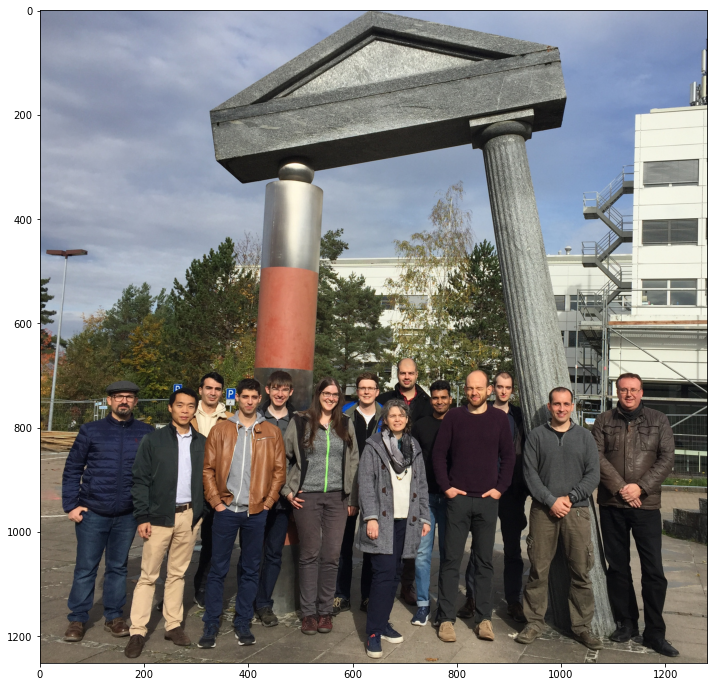

In [52]:
A = imread('test.jpg')
plt.figure(figsize = (10,10))
plt.imshow(A)

In the next step, we turn this image into a grayscale image by using the function `rgb2gray` below:

The image has: 1252 x 1280 pixels


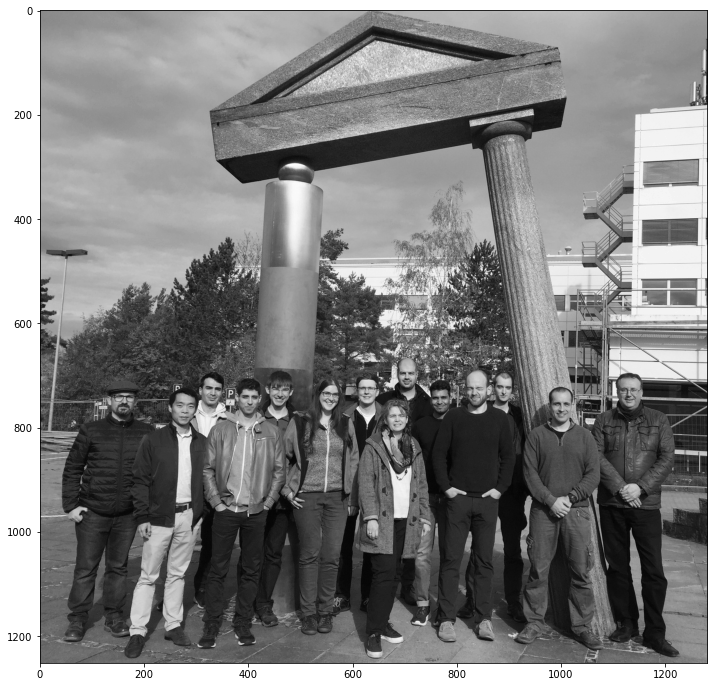

In [53]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
X = rgb2gray(A) # Convert RGB -> grayscale
print('The image has:',X.shape[0],'x',X.shape[1],'pixels')
plt.figure(figsize = (10,10))
plt.imshow(X,cmap='gray', vmin=0, vmax=255)

We will now apply the randomized SVD algorithm to the grayscale-image $m \times n$ matrix `X`. The algorithm consists of the following steps:
- Construct a $n \times r$ random matrix $P$ to sample the column space of $X$. $r$ is the so-called target rank, which is supposed to be smaller than the rank of $X$.
- Compute a new $m \times r$ matrix $Y=X \;P$.
- Apply QR decomposition to the matrix $Y$ such that $Y = Q \;R$.
- With the low rank basis $Q$, we can now project $X$ into a smaller space $\tilde X = Q^\top X$.
- Now we can apply SVD to $\tilde X$, which is much smaller than $X$: $\tilde X = \tilde U \tilde \Sigma \tilde V^\top$.
- Modify the left singular vectors $U = Q \tilde U$. The approximate SVD is then given by $U, \tilde \Sigma,  \tilde V^\top$.

<div class="alert alert-success">

**Task**: Complete the function `randomizedSVD` below. The function inputs are the data matrix $X$ and the target rank $r$. The function should return the outputs $U$, $S$ and $V^\top$, which approximate the standard SVD up to rank $r$. Use `np.random.randn` to generate the random matrix based on the standard normal distribution.
</div>

In [63]:
# randomized SVD function
def randomizedSVD(X,r):
    
    # TO DO
    
    n = np.shape(X)
    P = np.random.randn(n[1], r)
    
    Y = np.zeros((n[0], r))
    Y = np.matmul(X, P)
    
    Q, R = np.linalg.qr(Y)
    
    X_tilde = np.matmul(Q.transpose(), X)
    
    U_tilde, S_tilde, VT_tilde = np.linalg.svd(X_tilde)
    
    U = np.matmul(Q, U_tilde)
    
    return U, S_tilde, VT_tilde

<div class="alert alert-success">

**Task**: Compare the run-time differences between the standard SVD and the randomized SVD (for $r= 200$) on the data matrix $X$ of the image. You may use the `np.linalg.svd` for the standard SVD.
</div>

In [72]:
%%timeit

U, S_tilde, VT_tilde = randomizedSVD(X, 200)

#Output: 82.8 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

82.8 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
%%timeit
U, S, VT = np.linalg.svd(X, 200)

#Output: 645 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

645 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<div class="alert alert-success">

**Task**: Plot the compressed images by using the SVD-based image compression. One picture is compressed using the standard SVD and the other picture is compressed using the randomized SVD. Take the first $200$ singular values for the image reconstruction.  
</div>

In [79]:
# TO DO

In [ ]:
# TO DO